In [1]:
import pickle
import numpy as np
import pandas as pd

import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

from gmca.genetic_algorithm import GMCA
from city.generator_nodes import GeneratorNodes
from city.connector_nodes import ConnectorNodes

# Interface for building new cities

In [2]:
class City:
    
    def __init__(self, n_nodes: int, n_neighborhood: int):
        
        self.gn = GeneratorNodes(n_nodes, n_neighborhood)
        self.cn = ConnectorNodes(self.gn.nodes)
    
    
    def create_node_data(self, nodes: list) -> dict:
        
        node_data = dict()
        for node_id, node in enumerate(nodes):
        
            node_data[node] = {

                'node_id': node_id,
                'LAT': node[0], 
                'LON': node[1]
            }
       
        return node_data

    def create_edge_data(self, node_data: dict, connections: list) -> dict:
    
        edge_data = dict()
        for node1, node2 in connections:

            dx = node1[0] - node2[0]
            dy = node1[1] - node2[1]

            edge_data[(node1, node2)] = {
                'node1_id': node_data[node1]['node_id'],
                'node2_id': node_data[node2]['node_id'],
                'time': np.random.uniform(1, 3) * np.hypot(dx, dy) 
            }
        
        return edge_data
        
        
    def create_city(self) -> nx.Graph:
        
        node_data = self.create_node_data(self.gn.nodes)
        edge_data = self.create_edge_data(node_data, self.cn.connections)
        
        G = nx.Graph()
        for key in node_data:
            G.add_nodes_from([node_data[key]['node_id']],
                             LAT = node_data[key]['LAT'],
                             LON = node_data[key]['LON']
                            )
            
        for key in edge_data:
            G.add_edge(edge_data[key]['node1_id'], 
                       edge_data[key]['node2_id'],
                       Time = edge_data[key]['time']
                      )
            
        return G

In [3]:
n_nodes = 250
n_neighborhood = 4

In [4]:
city = City(n_nodes, n_neighborhood)
G = city.create_city()

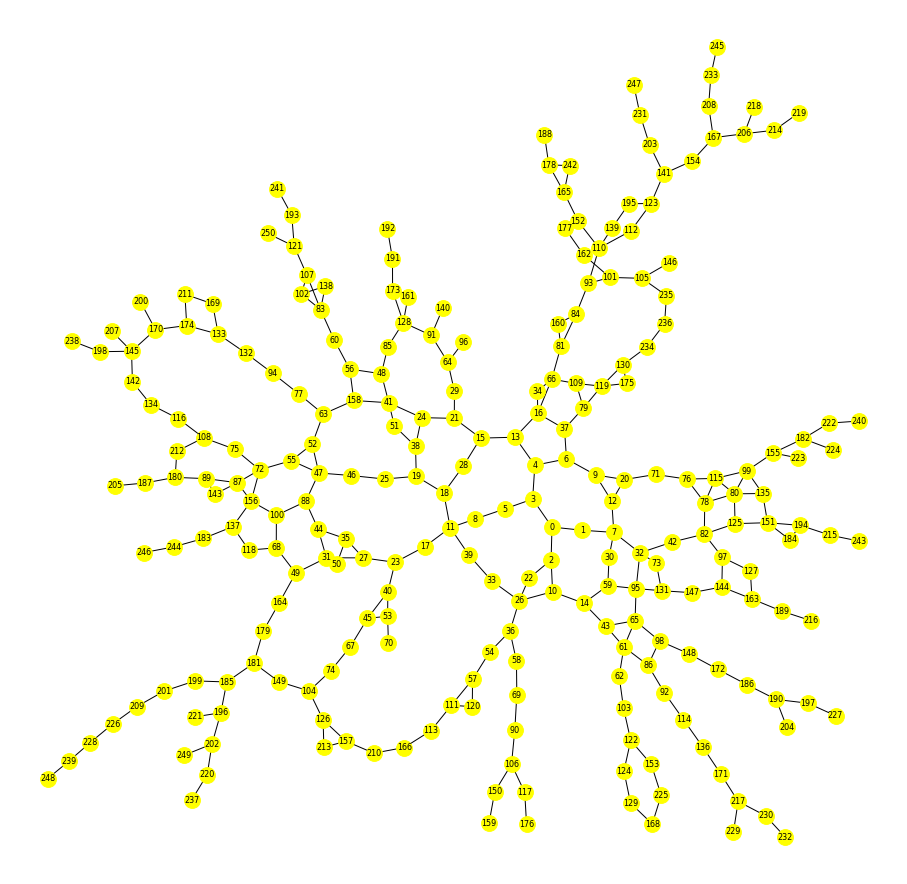

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog = 'neato')

nx.draw(G, pos, ax = ax, node_size = 250, node_color = 'yellow')
_ = nx.draw_networkx_labels(G, pos = pos, ax = ax, font_size = 8)

In [ ]:
with open('graphs/graph6.pickle', 'wb') as f:
    pickle.dump(G, f)

# Download city template

In [6]:
with open('graphs/graph1.pickle', 'rb') as f:
    G = pickle.load(f)

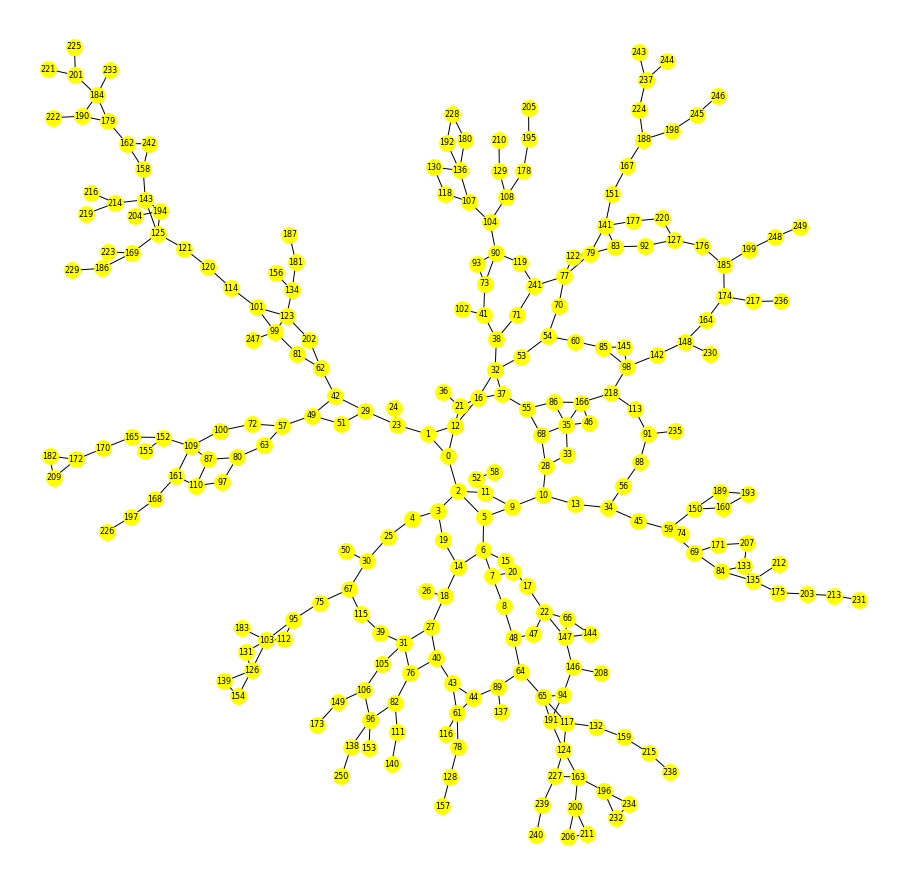

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog = 'neato')

nx.draw(G, pos, ax = ax, node_size = 250, node_color = 'yellow')
_ = nx.draw_networkx_labels(G, pos = pos, ax = ax, font_size = 8)

# Genetic K-means Clustering Algorithm

In [ ]:
gmca = GMCA(G, 5, 150)
gmca.fit(n_iter = 150)

Iteration: 0
SICV: 1120.996, Medoids: {7, 176, 152, 158, 95}
SICV: 1121.999, Medoids: {32, 65, 161, 233, 111}
SICV: 1128.585, Medoids: {109, 14, 47, 143, 55}
SICV: 1137.156, Medoids: {41, 48, 242, 23, 25}
SICV: 1160.911, Medoids: {37, 143, 113, 19, 87}

Iteration: 1
SICV: 1104.983, Medoids: {100, 38, 176, 184, 31}
SICV: 1120.996, Medoids: {7, 176, 152, 158, 95}
SICV: 1121.999, Medoids: {32, 65, 161, 233, 111}
SICV: 1122.407, Medoids: {37, 6, 168, 143, 156}
SICV: 1127.049, Medoids: {43, 171, 242, 85, 87}

Iteration: 2
SICV: 1088.839, Medoids: {162, 2, 71, 72, 30}
SICV: 1090.444, Medoids: {3, 38, 143, 80, 146}
SICV: 1091.402, Medoids: {227, 37, 6, 143, 87}
SICV: 1097.632, Medoids: {2, 8, 143, 176, 63}
SICV: 1099.957, Medoids: {100, 7, 43, 16, 114}

Iteration: 3
SICV: 1020.447, Medoids: {32, 194, 5, 110, 115}
SICV: 1087.341, Medoids: {69, 38, 6, 76, 179}
SICV: 1088.839, Medoids: {162, 2, 71, 72, 30}
SICV: 1090.184, Medoids: {41, 49, 179, 27, 92}
SICV: 1090.444, Medoids: {3, 38, 143, 80, 1

Iteration: 34
SICV: 971.114, Medoids: {69, 38, 40, 143, 57}
SICV: 973.107, Medoids: {69, 38, 40, 143, 49}
SICV: 975.503, Medoids: {100, 6, 77, 143, 31}
SICV: 976.549, Medoids: {6, 72, 77, 158, 31}
SICV: 978.159, Medoids: {38, 6, 72, 143, 31}

Iteration: 35
SICV: 971.114, Medoids: {69, 38, 40, 143, 57}
SICV: 973.107, Medoids: {69, 38, 40, 143, 49}
SICV: 975.503, Medoids: {100, 6, 77, 143, 31}
SICV: 976.549, Medoids: {6, 72, 77, 158, 31}
SICV: 978.159, Medoids: {38, 6, 72, 143, 31}

Iteration: 36
SICV: 971.114, Medoids: {69, 38, 40, 143, 57}
SICV: 973.107, Medoids: {69, 38, 40, 143, 49}
SICV: 975.503, Medoids: {100, 6, 77, 143, 31}
SICV: 976.549, Medoids: {6, 72, 77, 158, 31}
SICV: 978.159, Medoids: {38, 6, 72, 143, 31}

Iteration: 37
SICV: 971.107, Medoids: {5, 109, 143, 241, 31}
SICV: 971.114, Medoids: {69, 38, 40, 143, 57}
SICV: 973.107, Medoids: {69, 38, 40, 143, 49}
SICV: 973.225, Medoids: {100, 69, 38, 43, 143}
SICV: 975.503, Medoids: {100, 6, 77, 143, 31}

Iteration: 38
SICV: 971.

Iteration: 68
SICV: 970.069, Medoids: {38, 44, 143, 49, 59}
SICV: 970.907, Medoids: {9, 77, 143, 49, 31}
SICV: 970.989, Medoids: {5, 42, 77, 143, 31}
SICV: 971.107, Medoids: {5, 109, 143, 241, 31}
SICV: 971.114, Medoids: {69, 38, 40, 143, 57}

Iteration: 69
SICV: 970.069, Medoids: {38, 44, 143, 49, 59}
SICV: 970.907, Medoids: {9, 77, 143, 49, 31}
SICV: 970.989, Medoids: {5, 42, 77, 143, 31}
SICV: 971.107, Medoids: {5, 109, 143, 241, 31}
SICV: 971.114, Medoids: {69, 38, 40, 143, 57}

Iteration: 70
SICV: 970.069, Medoids: {38, 44, 143, 49, 59}
SICV: 970.907, Medoids: {9, 77, 143, 49, 31}
SICV: 970.989, Medoids: {5, 42, 77, 143, 31}
SICV: 971.107, Medoids: {5, 109, 143, 241, 31}
SICV: 971.114, Medoids: {69, 38, 40, 143, 57}

Iteration: 71
SICV: 970.069, Medoids: {38, 44, 143, 49, 59}
SICV: 970.907, Medoids: {9, 77, 143, 49, 31}
SICV: 970.989, Medoids: {5, 42, 77, 143, 31}
SICV: 971.107, Medoids: {5, 109, 143, 241, 31}
SICV: 971.114, Medoids: {69, 38, 40, 143, 57}

Iteration: 72
SICV: 969.

Iteration: 102
SICV: 963.735, Medoids: {5, 109, 77, 143, 31}
SICV: 967.261, Medoids: {5, 77, 152, 125, 31}
SICV: 967.865, Medoids: {9, 77, 109, 143, 31}
SICV: 967.906, Medoids: {5, 77, 143, 49, 31}
SICV: 968.117, Medoids: {100, 5, 77, 143, 31}

Iteration: 103
SICV: 963.735, Medoids: {5, 109, 77, 143, 31}
SICV: 967.261, Medoids: {5, 77, 152, 125, 31}
SICV: 967.865, Medoids: {9, 77, 109, 143, 31}
SICV: 967.906, Medoids: {5, 77, 143, 49, 31}
SICV: 968.117, Medoids: {100, 5, 77, 143, 31}

Iteration: 104
SICV: 963.735, Medoids: {5, 109, 77, 143, 31}
SICV: 967.261, Medoids: {5, 77, 152, 125, 31}
SICV: 967.865, Medoids: {9, 77, 109, 143, 31}
SICV: 967.906, Medoids: {5, 77, 143, 49, 31}
SICV: 968.117, Medoids: {100, 5, 77, 143, 31}

Iteration: 105
SICV: 963.735, Medoids: {5, 109, 77, 143, 31}
SICV: 967.261, Medoids: {5, 77, 152, 125, 31}
SICV: 967.865, Medoids: {9, 77, 109, 143, 31}
SICV: 967.906, Medoids: {5, 77, 143, 49, 31}
SICV: 968.117, Medoids: {100, 5, 77, 143, 31}

Iteration: 106
SICV:

In [ ]:
cluster_data = gmca.clusters
chromosome = gmca.TB_chromosome

In [ ]:
chromosome.medoids

In [ ]:
chromosome.SICV

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog = 'neato')

color_data = []
for node in G.nodes():
    for color, medoid in enumerate(chromosome.medoids):
        
        if node == medoid:
            color_data.append(len(chromosome.medoids) - color)
            
        elif node in cluster_data[medoid]:
            color_data.append(color)

nx.draw(G, pos, ax = ax, node_size = 250, node_color = color_data, cmap = plt.cm.gist_rainbow)
_ = nx.draw_networkx_labels(G, pos = pos, ax = ax, font_size = 8)

In [ ]:
data = pd.DataFrame({ 'medoid': medoid, 'node': node, 'time': gmca.mdb.time_table[medoid, node]}
                    for medoid in cluster_data 
                    for node in cluster_data[medoid]
                   )

In [ ]:
agg_data = data.groupby('medoid')['time'].agg(['max', 'mean', 'count'])
agg_data

In [ ]:
sns.catplot(x = 'medoid', y = 'time', data = data)